In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
from textblob import Word
from nltk.corpus import stopwords
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
plt.style.use('ggplot')
import string
from string import digits

from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')

In [2]:
march=pd.read_csv('01_PREPROCESSED_MARCH.csv')
april=pd.read_csv('02_PREPROCESSED_APRIL.csv')
may=pd.read_csv('03_PREPROCESSED_MAY.csv')
june=pd.read_csv('04_PREPROCESSED_JUNE.csv')
july=pd.read_csv('05_PREPROCESSED_JULY.csv')
august=pd.read_csv('06_PREPROCESSED_AUGUST.csv')


In [3]:
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = "" 
    return (str1.join(s))

In [4]:
c_word=['[',']',"'",',',]

In [5]:
userhandle_list_march=march['attherate']
userhandle_list_april=april['attherate']
userhandle_list_may=may['attherate']
userhandle_list_june=june['attherate']
userhandle_list_july=july['attherate']
userhandle_list_august=august['attherate']

In [6]:
for i in range(0,march.shape[0]):
    ls=list(march['attherate'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    userhandle_list_march[i]=ls

for i in range(0,april.shape[0]):
    ls=list(april['attherate'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    userhandle_list_april[i]=ls

for i in range(0,may.shape[0]):
    ls=list(may['attherate'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    userhandle_list_may[i]=ls

for i in range(0,june.shape[0]):
    ls=list(june['attherate'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    userhandle_list_june[i]=ls

for i in range(0,july.shape[0]):
    ls=list(july['attherate'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    userhandle_list_july[i]=ls

for i in range(0,august.shape[0]):
    ls=list(august['attherate'][i])
    ls=remove_words(ls,c_word)
    ls=listToString(ls)
    userhandle_list_august[i]=ls

In [7]:
userhandle_tokens_march= [token for line in userhandle_list_march for token in line.split()]
userhandle_tokens_april= [token for line in userhandle_list_april for token in line.split()]
userhandle_tokens_may= [token for line in userhandle_list_may for token in line.split()]
userhandle_tokens_june= [token for line in userhandle_list_june for token in line.split()]
userhandle_tokens_july= [token for line in userhandle_list_july for token in line.split()]
userhandle_tokens_august= [token for line in userhandle_list_august for token in line.split()]

In [8]:
userhandle_tokens_march

['@GoogleNews',
 '@Alhamdhulillaah',
 '@YMasannat',
 '@VGDakessian',
 '@MailOnline',
 '@YMasannat',
 '@VGDakessian',
 '@Asad_Umar',
 '@fslsltn',
 '@ShashiTharoor',
 '@7HillsHospital',
 '@ZelenskyyUa',
 '@aryan66',
 '@balbir59',
 '@BbmpsplHealth',
 '@rajeshtope11',
 '@Dev_Fadnavis',
 '@AjitPawarSpeaks',
 '@rajeshtope11',
 '@Dev_Fadnavis',
 '@AjitPawarSpeaks',
 '@rajeshtope11',
 '@iijnmbangalore',
 '@CMOMaharashtra',
 '@AUThackeray',
 '@WendyGwalior',
 '@myogiadityanath',
 '@',
 '@drmjabalpur',
 '@drmdhnecr',
 '@RailwaySeva',
 '@VinGuptaMD',
 '@ICRC',
 '@ARanganathan72',
 '@srivathsacm',
 '@wionews',
 '@wionews',
 '@IndiGo6E',
 '@fekufakir',
 '@ParamveerChoud9',
 '@arpaninto1',
 '@BesuraTaansane',
 '@desimojito',
 '@Saranghae_peace',
 '@bsesdelhi',
 '@geonews_urdu',
 '@brightmoon_sky',
 '@mybmc',
 '@PMOIndia',
 '@HMOIndia',
 '@MoHFW_INDIA',
 '@CMOMaharashtra',
 '@AnilDeshmukhNCP',
 '@rajeshtope11',
 '@mayor_mumbai',
 '@mybmcHealthDept',
 '@mybmcPHD',
 '@PIBMumbai',
 '@mybmc',
 '@drharshv

In [9]:
userhandle_tokens_april

['@HemantSorenJMM',
 '@DCEastSinghbhum',
 '@BannaGupta76',
 '@Dublin_Called',
 '@NFitzPsychology',
 '@DCFaisalabad',
 '@ImranKhanPTI',
 '@OfficialNcoc',
 '@HealthPunjabGov',
 '@nhsrcofficial',
 '@DrMuradPTI',
 '@GabbbarSingh',
 '@BBMPCOMM',
 '@BBMPAdmn',
 '@PrakashJavdekar',
 '@AmitShah',
 '@narendramodi',
 '@EssexPR',
 '@abhymurarka',
 '@dakuwithchaku',
 '@andrabi_raiees',
 '@BloodDonorsIn',
 '@PMOIndia',
 '@narendramodi',
 '@vijayrupanibjp',
 '@collectorvalsad',
 '@AUThackeray',
 '@mybmc',
 '@A_Troglodyte_',
 '@Gov_of_india',
 '@iucngys',
 '@GlobalGoals',
 '@FarooqAhmedX',
 '@manoj_kotak',
 '@OfficeofUT',
 '@AUThackeray',
 '@PawarSpeaks',
 '@PMOIndia',
 '@LonewolfScyther',
 '@IndoreCollector',
 '@iShankarLalwani',
 '@JansamparkMP',
 '@manojkjhadu',
 '@EduMinOfIndia',
 '@fadlism',
 '@kudanai',
 '@OfficialNcoc',
 '@CMofKarnataka',
 '@siddaramaiah',
 '@hd_kumaraswamy',
 '@drharshvardhan',
 '@PMOIndia',
 '@OfficialDMRC',
 '@Asad_Umar',
 '@Shafqat_Mahmood',
 '@DrMuradPTI',
 '@NCOC_Officia

In [10]:
remove_single_char(userhandle_tokens_march)
remove_single_char(userhandle_tokens_april)
remove_single_char(userhandle_tokens_may)
remove_single_char(userhandle_tokens_june)
remove_single_char(userhandle_tokens_july)
remove_single_char(userhandle_tokens_august)

In [11]:
userhandle_tokens_march

['@GoogleNews',
 '@Alhamdhulillaah',
 '@YMasannat',
 '@VGDakessian',
 '@MailOnline',
 '@YMasannat',
 '@VGDakessian',
 '@Asad_Umar',
 '@fslsltn',
 '@ShashiTharoor',
 '@7HillsHospital',
 '@ZelenskyyUa',
 '@aryan66',
 '@balbir59',
 '@BbmpsplHealth',
 '@rajeshtope11',
 '@Dev_Fadnavis',
 '@AjitPawarSpeaks',
 '@rajeshtope11',
 '@Dev_Fadnavis',
 '@AjitPawarSpeaks',
 '@rajeshtope11',
 '@iijnmbangalore',
 '@CMOMaharashtra',
 '@AUThackeray',
 '@WendyGwalior',
 '@myogiadityanath',
 '@drmjabalpur',
 '@drmdhnecr',
 '@RailwaySeva',
 '@VinGuptaMD',
 '@ICRC',
 '@ARanganathan72',
 '@srivathsacm',
 '@wionews',
 '@wionews',
 '@IndiGo6E',
 '@fekufakir',
 '@ParamveerChoud9',
 '@arpaninto1',
 '@BesuraTaansane',
 '@desimojito',
 '@Saranghae_peace',
 '@bsesdelhi',
 '@geonews_urdu',
 '@brightmoon_sky',
 '@mybmc',
 '@PMOIndia',
 '@HMOIndia',
 '@MoHFW_INDIA',
 '@CMOMaharashtra',
 '@AnilDeshmukhNCP',
 '@rajeshtope11',
 '@mayor_mumbai',
 '@mybmcHealthDept',
 '@mybmcPHD',
 '@PIBMumbai',
 '@mybmc',
 '@drharshvardhan

In [12]:
def get_tweets_tokens(docx,num=100):
    num=len(docx)
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [13]:
most_common_userhandle_march = get_tweets_tokens(userhandle_tokens_march)
userhandle_df_march = pd.DataFrame(most_common_userhandle_march.items(),columns=['userhandle','scores'])

most_common_userhandle_april = get_tweets_tokens(userhandle_tokens_april)
userhandle_df_april = pd.DataFrame(most_common_userhandle_april.items(),columns=['userhandle','scores'])

most_common_userhandle_may = get_tweets_tokens(userhandle_tokens_may)
userhandle_df_may = pd.DataFrame(most_common_userhandle_may.items(),columns=['userhandle','scores'])

most_common_userhandle_june = get_tweets_tokens(userhandle_tokens_june)
userhandle_df_june = pd.DataFrame(most_common_userhandle_june.items(),columns=['userhandle','scores'])

most_common_userhandle_july = get_tweets_tokens(userhandle_tokens_july)
userhandle_df_july = pd.DataFrame(most_common_userhandle_july.items(),columns=['userhandle','scores'])

most_common_userhandle_august = get_tweets_tokens(userhandle_tokens_august)
userhandle_df_august = pd.DataFrame(most_common_userhandle_august.items(),columns=['userhandle','scores'])

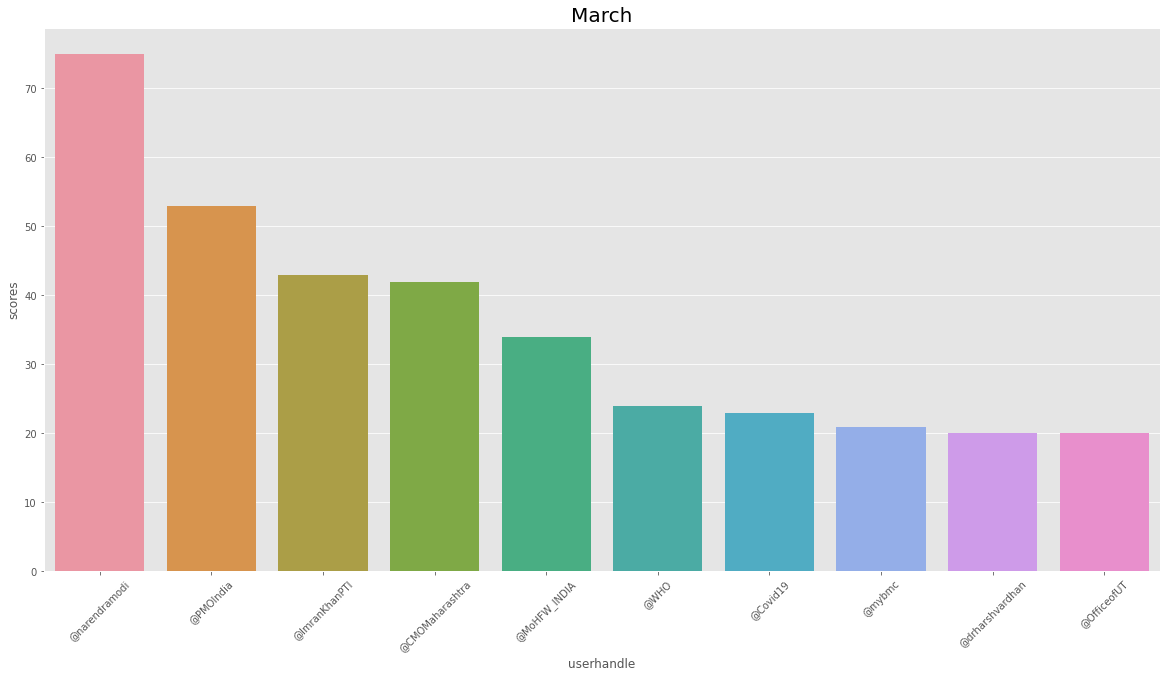

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x='userhandle',y='scores',data=userhandle_df_march[0:10])
plt.title('March',fontsize=20)
plt.xticks(rotation=45)
plt.show()

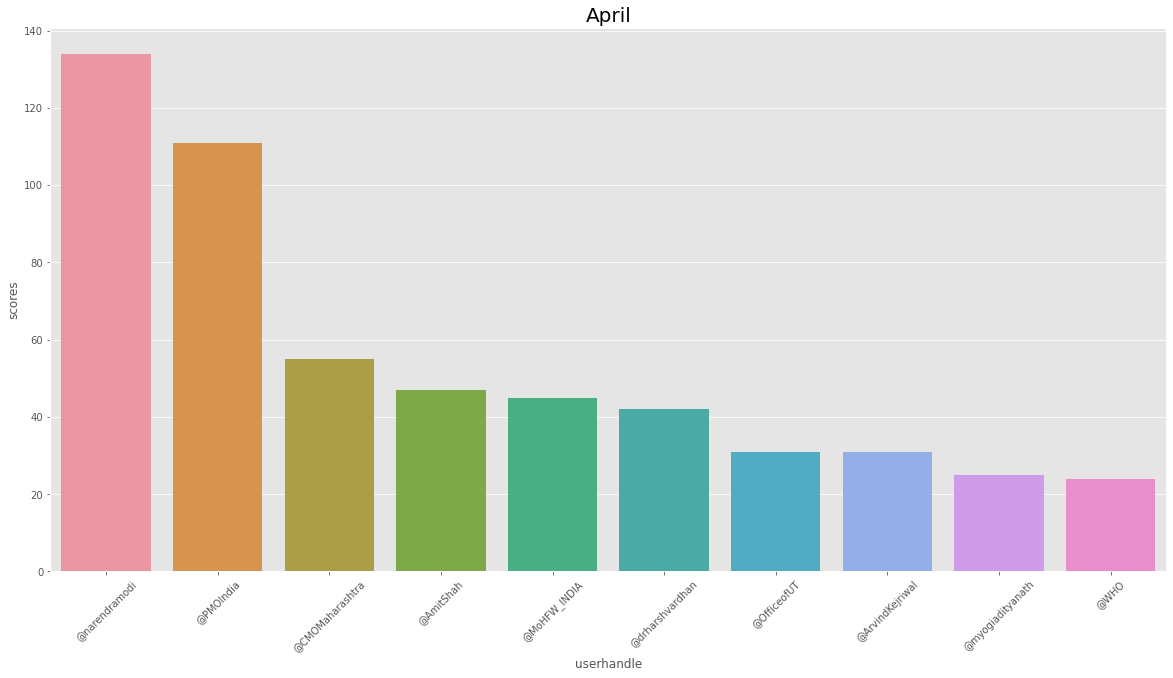

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x='userhandle',y='scores',data=userhandle_df_april[0:10])
plt.title('April',fontsize=20)
plt.xticks(rotation=45)
plt.show()

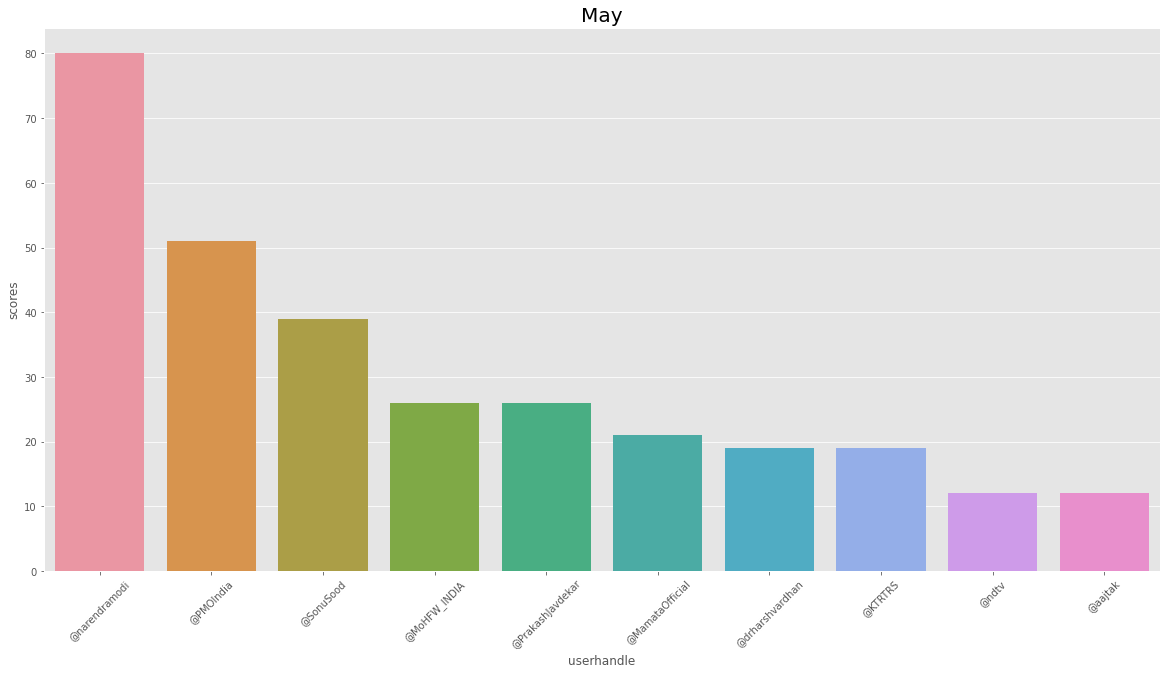

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x='userhandle',y='scores',data=userhandle_df_may[0:10])
plt.title('May',fontsize=20)
plt.xticks(rotation=45)
plt.show()

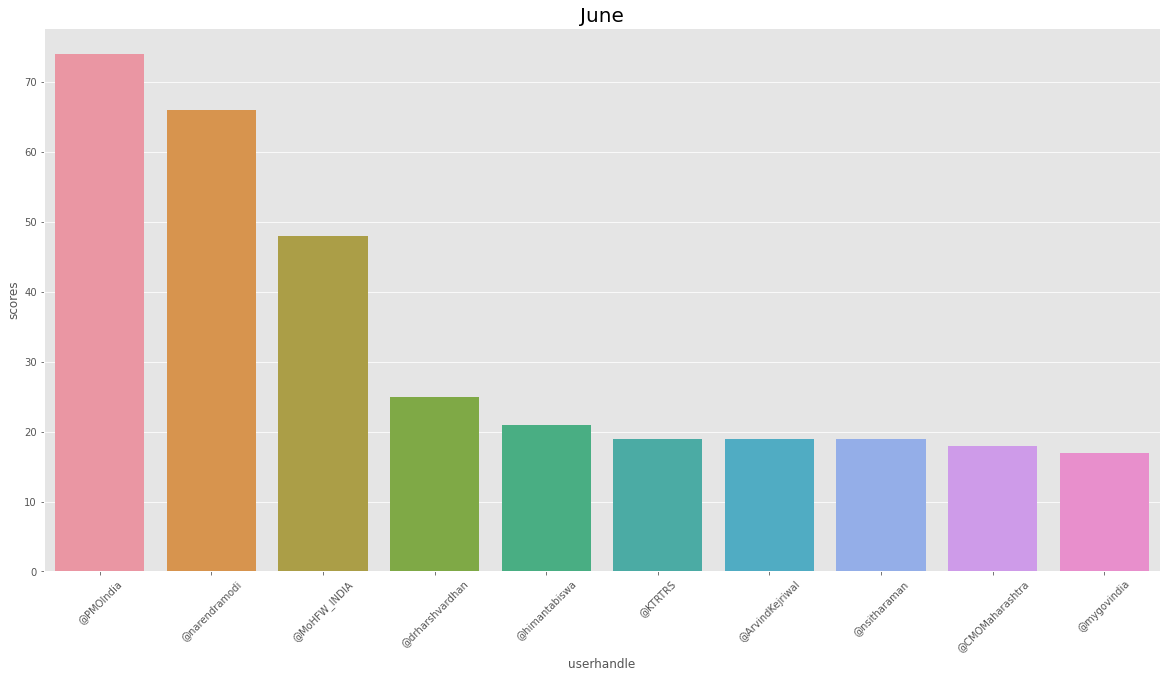

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x='userhandle',y='scores',data=userhandle_df_june[0:10])
plt.title('June',fontsize=20)
plt.xticks(rotation=45)
plt.show()

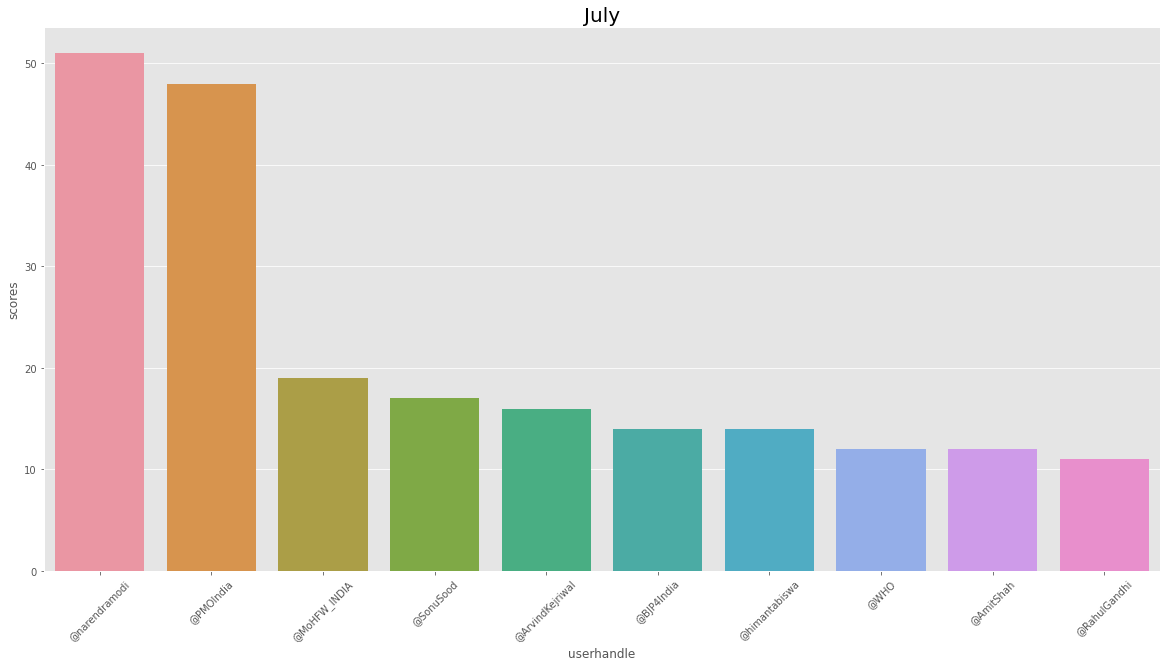

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(x='userhandle',y='scores',data=userhandle_df_july[0:10])
plt.title('July',fontsize=20)
plt.xticks(rotation=45)
plt.show()

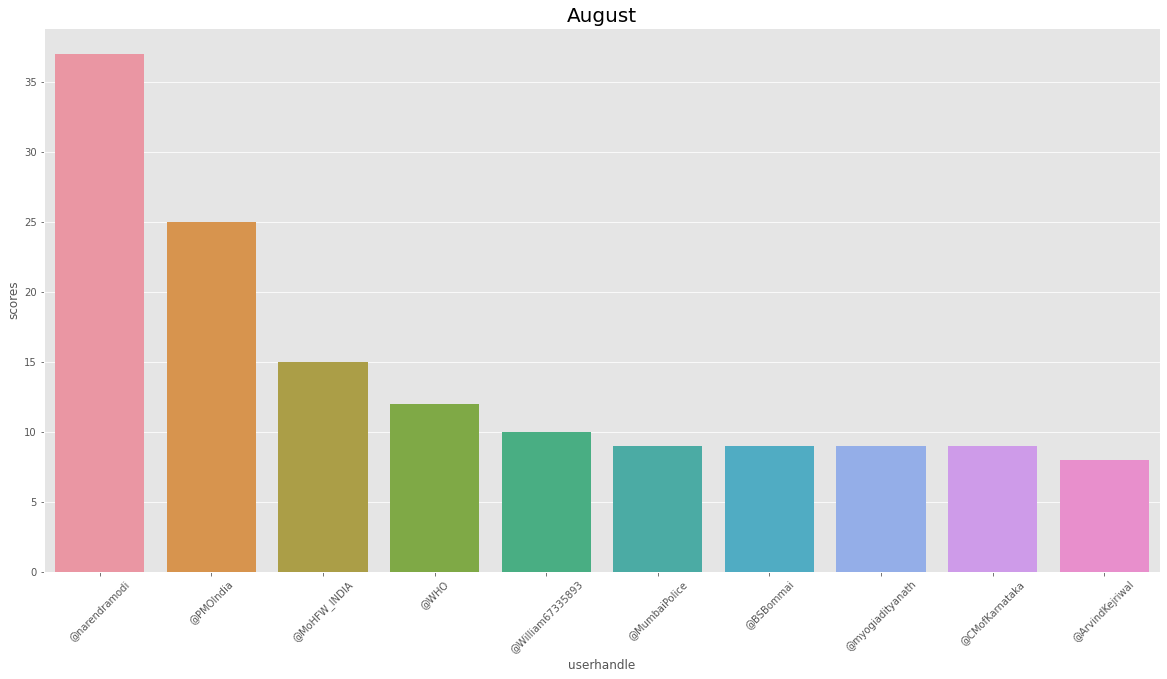

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x='userhandle',y='scores',data=userhandle_df_august[0:10]).set(title="August")
plt.title('August',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [20]:
userhandle_df_august.shape

(1107, 2)

In [21]:
x= '@narendramodi'
y='@SonuSood'
# '@SonuSood'
# '@RahulGandhi'
# '@narendramodi'
#'@MamataOfficial'
#'@Covid19'
# '@PMOIndia'
#'@ArvindKejriwal'

In [22]:
Userhandle_Freq_x=[0,0,0,0,0,0]
Userhandle_Freq_y=[0,0,0,0,0,0]
j=0
k=0

In [23]:
for i in range(0,userhandle_df_march.shape[0]):
    if(x ==userhandle_df_march['userhandle'][i]):
        Userhandle_Freq_x[j]=userhandle_df_march['scores'][i]
    if(y ==userhandle_df_march['userhandle'][i]):
        Userhandle_Freq_y[k]=userhandle_df_march['scores'][i]
j+=1
k+=1
for i in range(0,userhandle_df_april.shape[0]):
    if(x ==userhandle_df_april['userhandle'][i]):
        Userhandle_Freq_x[j]=userhandle_df_april['scores'][i]
    if(y ==userhandle_df_april['userhandle'][i]):
        Userhandle_Freq_y[k]=userhandle_df_april['scores'][i]
j+=1
k+=1
for i in range(0,userhandle_df_may.shape[0]):
    if(x ==userhandle_df_may['userhandle'][i]):
        Userhandle_Freq_x[j]=userhandle_df_may['scores'][i]
    if(y ==userhandle_df_may['userhandle'][i]):
        Userhandle_Freq_y[k]=userhandle_df_may['scores'][i]
j+=1
k+=1
for i in range(0,userhandle_df_june.shape[0]):
    if(x ==userhandle_df_june['userhandle'][i]):
        Userhandle_Freq_x[j]=userhandle_df_june['scores'][i]
    if(y ==userhandle_df_june['userhandle'][i]):
        Userhandle_Freq_y[k]=userhandle_df_june['scores'][i]
j+=1
k+=1
for i in range(0,userhandle_df_july.shape[0]):
    if(x ==userhandle_df_july['userhandle'][i]):
        Userhandle_Freq_x[j]=userhandle_df_july['scores'][i]
    if(y ==userhandle_df_july['userhandle'][i]):
        Userhandle_Freq_y[k]=userhandle_df_july['scores'][i]
j+=1
k+=1
for i in range(0,userhandle_df_august.shape[0]):
    if(x ==userhandle_df_april['userhandle'][i]):
        Userhandle_Freq_x[j]=userhandle_df_august['scores'][i]
    if(y ==userhandle_df_april['userhandle'][i]):
        Userhandle_Freq_y[k]=userhandle_df_august['scores'][i]

In [24]:
Userhandle_Freq_x

[75, 134, 80, 66, 51, 37]

In [25]:
Userhandle_Freq_y

[8, 20, 39, 16, 17, 6]

In [26]:
month=['March','April','May','June','july','August']

In [27]:
data_x={'freq':Userhandle_Freq_x,'month':month}
data_x

{'freq': [75, 134, 80, 66, 51, 37],
 'month': ['March', 'April', 'May', 'June', 'july', 'August']}

In [28]:
data_y={'freq':Userhandle_Freq_y,'month':month}
data_y

{'freq': [8, 20, 39, 16, 17, 6],
 'month': ['March', 'April', 'May', 'June', 'july', 'August']}

In [29]:
UserHandle_x=pd.DataFrame(data_x)
UserHandle_x

,freq,month
0,75,March
1,134,April
2,80,May
3,66,June
4,51,july
5,37,August


In [30]:
UserHandle_y=pd.DataFrame(data_y)
UserHandle_y

,freq,month
0,8,March
1,20,April
2,39,May
3,16,June
4,17,july
5,6,August


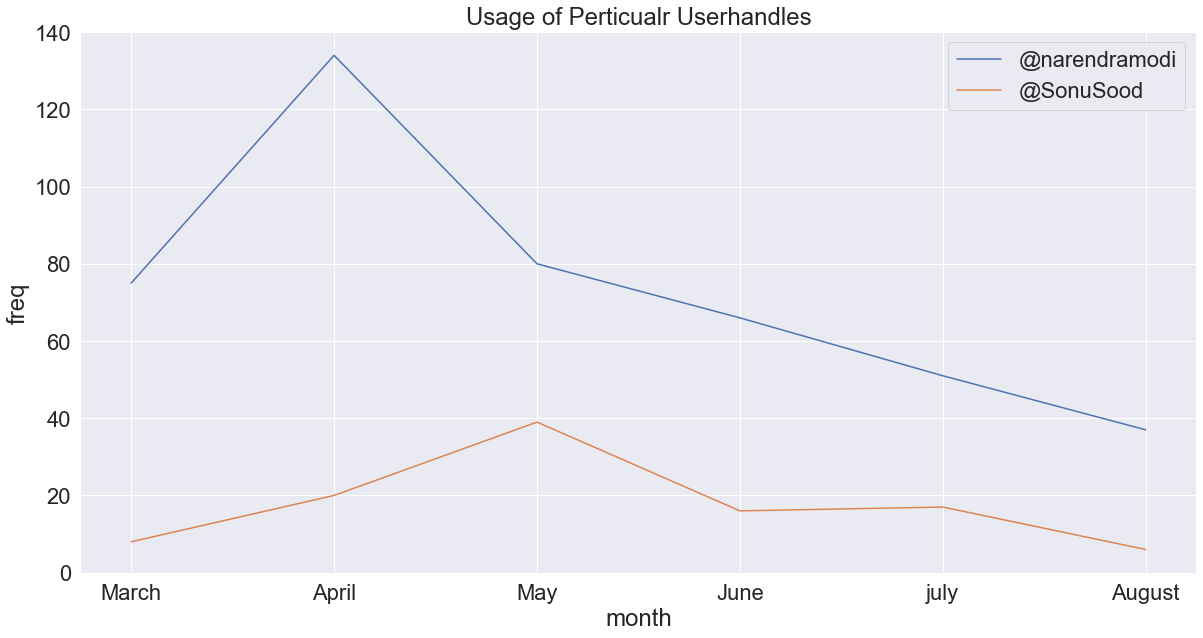

In [31]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.lineplot( data=UserHandle_x,x="month", y="freq").set(title="Usage of Perticualr Userhandles",)
sns.lineplot( data=UserHandle_y,x="month", y="freq")
plt.legend([x,y])
plt.show()